In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Datasets ML/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.describe(),df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


(              price          area    bedrooms   bathrooms     stories  \
 count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
 mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
 std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
 min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
 25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
 50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
 75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
 max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   
 
           parking  
 count  545.000000  
 mean     0.693578  
 std      0.861586  
 min      0.000000  
 25%      0.000000  
 50%      0.000000  
 75%      1.000000  
 max      3.000000  ,
 None)

In [4]:
df.iloc[:,5:13]   # here we can see data types are in string exceptparking

,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,yes,no,no,no,yes,2,yes,furnished
1,yes,no,no,no,yes,3,no,furnished
2,yes,no,yes,no,no,2,yes,semi-furnished
3,yes,no,yes,no,yes,3,yes,furnished
4,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,2,no,unfurnished
541,no,no,no,no,no,0,no,semi-furnished
542,yes,no,no,no,no,0,no,unfurnished
543,no,no,no,no,no,0,no,furnished


In [5]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
l=[5,6,7,8,9,11,12]
for x in l:
  y=le.fit_transform(df.iloc[:,x])
  df.iloc[:,x]=y
print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0  


<ipython-input-5-69e8e3eea540>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,x]=y
<ipython-input-5-69e8e3eea540>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,x]=y
<ipython-input-5-69e8e3eea540>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,x]=y
<ipython-input-5-69e8e3eea540>:6: 

In [6]:
df.describe(),df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


(              price          area    bedrooms   bathrooms     stories  \
 count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
 mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
 std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
 min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
 25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
 50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
 75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
 max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   
 
          mainroad   guestroom    basement  hotwaterheating  airconditioning  \
 count  545.000000  545.000000  545.000000       545.000000       545.000000   
 mean     0.858716    0.177982    0.350459         0.045872         0.315596   
 std      0.348635    0.382849    0.477552         0.209399         0.465180   
 min      0.

In [7]:
import seaborn as sns

<Axes: >

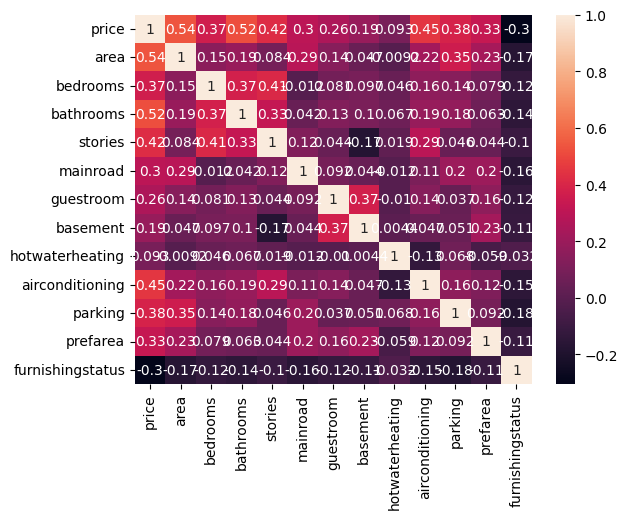

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
# sns.heatmap(df.corr(),annot=True)
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


In [10]:
x=df.drop(['price','guestroom','basement','hotwaterheating','furnishingstatus'],axis=1).values
y=df['price'].values
# x=df['area'].values
print(x.shape,'\n',y.shape)

(545, 8) 
 (545,)


In [11]:
type(x),type(y),x.shape

(numpy.ndarray, numpy.ndarray, (545, 8))

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=143)

In [13]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [14]:
from sklearn.model_selection import KFold, cross_val_score

folds = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(lr, X_train, Y_train, scoring='neg_mean_squared_error', cv=folds)
rmse = np.sqrt(np.mean(np.absolute(scores)))

print(rmse)


1172323.4655579224


In [15]:
Y_pred_test=lr.predict(X_test)
Y_pred_train=lr.predict(X_train)

In [16]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('For Test Data')
print('R2 score ',r2_score(Y_test,Y_pred_test))
print(f'Mean Absolute Error : {mean_absolute_error(Y_test,Y_pred_test)}')
print(f"Mean Squared Error : {mean_squared_error(Y_test,Y_pred_test)}")

For Test Data
R2 score  0.6505512634603656
Mean Absolute Error : 792696.3791546833
Mean Squared Error : 1101548347750.9016


In [17]:
print('For Trained Data')
print('R2 score ',r2_score(Y_train,Y_pred_train))
print(f'Mean Absolute Error : {mean_absolute_error(Y_train,Y_pred_train)}')
print(f"Mean Squared Error : {mean_squared_error(Y_train,Y_pred_train)}")
print(f"Root Mean Squared Error : {np.sqrt(mean_squared_error(Y_train,Y_pred_train))}")


For Trained Data
R2 score  0.6399085554883441
Mean Absolute Error : 846915.318133537
Mean Squared Error : 1309496940727.1665
Root Mean Squared Error : 1144332.5306601953


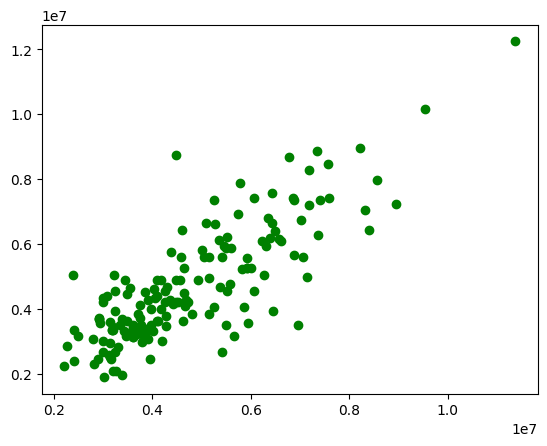

In [18]:
plt.scatter(Y_pred_test,Y_test,color='green')
# print(Y_pred_test,'\n',Y_test)

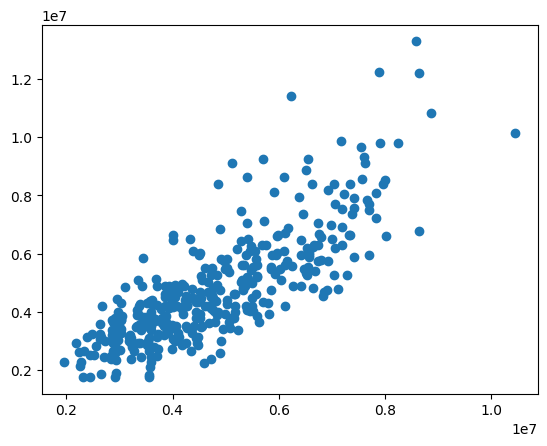

In [19]:
plt.scatter(Y_pred_train,Y_train)

<ipython-input-20-bdd37e22e22d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=30)


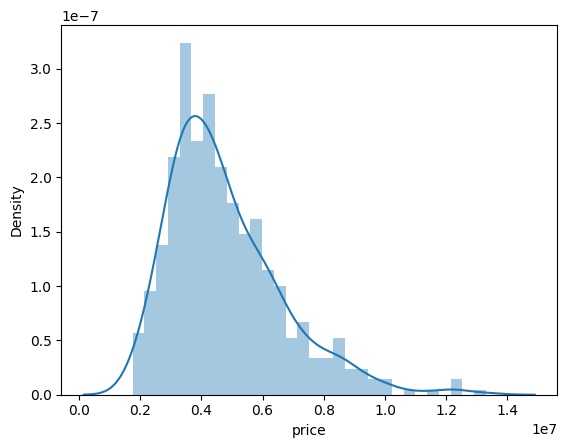

In [20]:
sns.distplot(df['price'], bins=30)
plt.show()